In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

with open("/content/drive/MyDrive/morpho_project_2025/prep_data.pkl", "rb") as file:
  prep_data = pickle.load(file)

print(prep_data.keys())

dict_keys(['lemma_to_supersense', 'lemma_to_hypersense', 'supersense_set', 'hypersense_set', 'words', 'embeddings', 'words_bow', 'embeddings_bow', 'ambiguous_sslemmas', 'ambiguous_hslemmas'])


In [ ]:
# Because the words have also a pos tag after the lemma, so we probably have to remove them.
words = []
embeddings = []
for i, word in enumerate(prep_data['words']):
   new_word = word.split("_")
   if new_word[1] == "nom":
       words.append(new_word[0])
       embeddings.append(prep_data['embeddings'][i])

print(words[:100])
print(len(words))
print(len(embeddings))

['an', 'temps', 'jour', 'année', 'travail', 'personne', 'vie', 'formation', 'monde', 'site', 'service', 'cas', 'entreprise', 'question', 'enfant', 'homme', 'chose', 'fois', 'place', 'projet', 'pays', 'point', 'droit', 'effet', 'fait', 'article', 'groupe', 'exemple', 'lieu', 'conseil', 'recherche', 'partie', 'problème', 'moi|mois', 'heure', 'part', 'niveau', 'système', 'monsieur', 'information', 'femme', 'jeu', 'loi', 'société', 'moment', 'ville', 'cour|cours', 'fin', 'histoire', 'rapport', 'activité', 'nombre', 'besoin', 'étude', 'prix', 'action', 'produit', 'nom', 'compte', 'programme', 'raison', 'mesure', 'développement', 'centre', 'maison', 'ligne', 'idée', 'eau', 'forme', 'page', 'école', 'famille', 'suite', 'équipe', 'qualité', 'dieu', 'cadre', 'fonction', 'façon', 'semaine', 'merci', 'mot', 'situation', 'sujet', 'marché', 'internet', 'image', 'coup', 'un', 'mise', 'livre', 'résultat', 'président', 'membre', 'titre', 'condition', 'texte', 'côté', 'sen|sens', 'terme']
720571
720571

In [ ]:
# BOW embeddings, not used
words_bow = []
embeddings_bow = []
for i, word in enumerate(prep_data['words_bow']):
   new_word = word.split("_")
   if new_word[1] == "nom":
      words_bow.append(new_word[0])
      embeddings_bow.append(prep_data['embeddings_bow'][i])

print(words_bow[:100])
print(len(words_bow))
print(len(embeddings_bow))

['an', 'temps', 'jour', 'année', 'travail', 'personne', 'vie', 'formation', 'monde', 'site', 'service', 'cas', 'entreprise', 'question', 'enfant', 'homme', 'chose', 'fois', 'place', 'projet', 'pays', 'point', 'droit', 'effet', 'fait', 'article', 'groupe', 'exemple', 'lieu', 'conseil', 'recherche', 'partie', 'problème', 'moi|mois', 'heure', 'part', 'niveau', 'système', 'monsieur', 'information', 'femme', 'jeu', 'loi', 'société', 'moment', 'ville', 'cour|cours', 'fin', 'histoire', 'rapport', 'activité', 'nombre', 'besoin', 'étude', 'prix', 'action', 'produit', 'nom', 'compte', 'programme', 'raison', 'mesure', 'développement', 'centre', 'maison', 'ligne', 'idée', 'eau', 'forme', 'page', 'école', 'famille', 'suite', 'équipe', 'qualité', 'dieu', 'cadre', 'fonction', 'façon', 'semaine', 'merci', 'mot', 'situation', 'sujet', 'marché', 'internet', 'image', 'coup', 'un', 'mise', 'livre', 'résultat', 'président', 'membre', 'titre', 'condition', 'texte', 'côté', 'sen|sens', 'terme']
720571
720571

In [ ]:
lemma_to_supersense = prep_data['lemma_to_supersense']
lemma_to_hypersense = prep_data['lemma_to_hypersense']

In [ ]:
print(lemma_to_supersense.get('inférieur'))
print(lemma_to_supersense.get('seigneur'))

['person']
['person']


In [ ]:
# according to supersense
all_eur_words = [word for word in words if word.endswith('eur') and
                  (lemma_to_supersense.get(word) == ['person', 'artifact'] or
                   lemma_to_supersense.get(word) == ['person'] or
                    lemma_to_supersense.get(word) == ['artifact'])]

either_eur_words = [word for word in words if word.endswith('eur') and
                    (lemma_to_supersense.get(word) == ['person'] or
                     lemma_to_supersense.get(word) == ['artifact'])]

In [ ]:
print(len(all_eur_words))
print(all_eur_words[:100])

2796
['directeur', 'joueur', 'acteur', 'professeur', 'lecteur', 'utilisateur', 'docteur', 'éditeur', 'consommateur', 'ordinateur', 'travailleur', 'chercheur', 'employeur', 'serveur', 'ingénieur', 'fournisseur', 'visiteur', 'amateur', 'électeur', 'collaborateur', 'spectateur', 'fondateur', 'créateur', 'investisseur', 'demandeur', 'entrepreneur', 'vendeur', 'réalisateur', 'agriculteur', 'seigneur', 'défenseur', 'navigateur', 'sénateur', 'vainqueur', 'procureur', 'chanteur', 'inspecteur', 'interlocuteur', 'acheteur', 'rapporteur', 'chasseur', 'capteur', 'observateur', 'chômeur', 'développeur', 'distributeur', 'monseigneur', 'organisateur', 'pasteur', 'compositeur', 'serviteur', 'ambassadeur', 'réacteur', 'gouverneur', 'rédacteur', 'pêcheur', 'auditeur', 'chauffeur', 'éleveur', 'médiateur', 'annonceur', 'décideur', 'législateur', 'bailleur', 'détenteur', 'formateur', 'voleur', 'commentateur', 'donneur', 'concepteur', 'transporteur', 'danseur', 'sauveur', 'tuteur', 'instituteur', 'processeu

In [ ]:
print(len(either_eur_words))
print(either_eur_words[:100])

2520
['directeur', 'joueur', 'acteur', 'professeur', 'utilisateur', 'consommateur', 'travailleur', 'employeur', 'ingénieur', 'fournisseur', 'visiteur', 'amateur', 'électeur', 'collaborateur', 'spectateur', 'fondateur', 'créateur', 'investisseur', 'demandeur', 'entrepreneur', 'vendeur', 'réalisateur', 'agriculteur', 'seigneur', 'sénateur', 'vainqueur', 'procureur', 'chanteur', 'inspecteur', 'interlocuteur', 'acheteur', 'capteur', 'observateur', 'chômeur', 'développeur', 'monseigneur', 'organisateur', 'pasteur', 'compositeur', 'ambassadeur', 'réacteur', 'gouverneur', 'rédacteur', 'pêcheur', 'auditeur', 'chauffeur', 'éleveur', 'médiateur', 'annonceur', 'décideur', 'législateur', 'bailleur', 'détenteur', 'formateur', 'voleur', 'commentateur', 'donneur', 'concepteur', 'danseur', 'sauveur', 'instituteur', 'processeur', 'enquêteur', 'dictateur', 'téléspectateur', 'dessinateur', 'emprunteur', 'preneur', 'metteur', 'penseur', 'réfrigérateur', 'acquéreur', 'narrateur', 'contributeur', 'pécheur',

In [ ]:
# according to hypersense
all_eur_words_2 = [word for word in words if word.endswith('eur') and
                  (lemma_to_hypersense.get(word) == ['inanimate_entity', 'animate_entity'] or
                   lemma_to_hypersense.get(word) == ['inanimate_entity'] or
                    lemma_to_hypersense.get(word) == ['animate_entity'])]

either_eur_words_2 = [word for word in words if word.endswith('eur') and
 (lemma_to_hypersense.get(word)  == ['inanimate_entity'] or lemma_to_hypersense.get(word) == ['animate_entity'])]

In [ ]:
print(len(all_eur_words_2))
print(all_eur_words_2[:100])

print(len(either_eur_words_2))
print(either_eur_words_2[:100])

2990
['monsieur', 'directeur', 'joueur', 'acteur', 'professeur', 'lecteur', 'utilisateur', 'moteur', 'docteur', 'éditeur', 'consommateur', 'ordinateur', 'travailleur', 'chercheur', 'employeur', 'serveur', 'ingénieur', 'fournisseur', 'visiteur', 'amateur', 'producteur', 'électeur', 'collaborateur', 'spectateur', 'fondateur', 'créateur', 'investisseur', 'demandeur', 'entrepreneur', 'vendeur', 'réalisateur', 'agriculteur', 'seigneur', 'défenseur', 'navigateur', 'sénateur', 'vainqueur', 'voyageur', 'procureur', 'chanteur', 'inspecteur', 'interlocuteur', 'acheteur', 'rapporteur', 'animateur', 'chasseur', 'capteur', 'observateur', 'chômeur', 'développeur', 'distributeur', 'monseigneur', 'organisateur', 'pasteur', 'compositeur', 'entraîneur', 'serviteur', 'ambassadeur', 'réacteur', 'coureur', 'gouverneur', 'rédacteur', 'pêcheur', 'auditeur', 'tumeur', 'chauffeur', 'éleveur', 'médiateur', 'annonceur', 'décideur', 'législateur', 'bailleur', 'fumeur', 'détenteur', 'promoteur', 'formateur', 'éduc

### Classifier 1

3 classes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

label_map = {
    ('inanimate_entity',): 0,
    ('animate_entity',): 1,
    ('inanimate_entity', 'animate_entity'): 2,
    ('animate_entity', 'inanimate_entity'): 2  # the order might be different
}

X, y = [], []

for i, word in enumerate(words):
    if not word.endswith('eur'):
      continue
    label = tuple(lemma_to_hypersense.get(word, []))
    if label not in label_map:
      continue
    vector = embeddings[i]
    X.append(vector)
    y.append(label_map[label])

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(2990, 100)
(2990,)


In [ ]:
import torch.nn as nn

class ProbingMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=2, dropout_rate=0.5):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Preparation of data
X = np.array(X, dtype=np.float32)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

Final classification report on validation set:
              precision    recall  f1-score   support

   inanimate       0.70      0.79      0.74       125
     animate       0.87      0.96      0.92       409
   ambiguous       0.50      0.05      0.09        64

    accuracy                           0.83       598
   macro avg       0.69      0.60      0.58       598
weighted avg       0.80      0.83      0.79       598



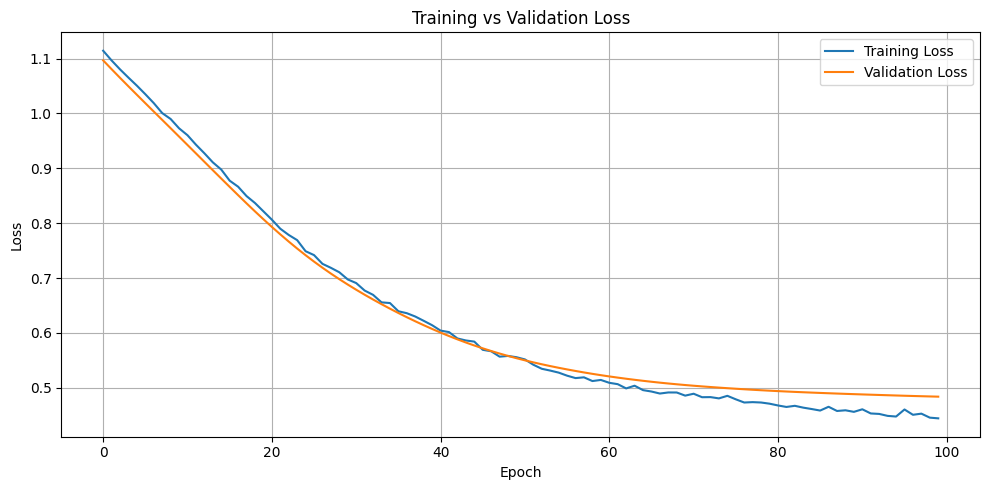

              precision    recall  f1-score   support

   inanimate       0.70      0.79      0.74       125
     animate       0.87      0.96      0.92       409
   ambiguous       0.50      0.05      0.09        64

    accuracy                           0.83       598
   macro avg       0.69      0.60      0.58       598
weighted avg       0.80      0.83      0.79       598



In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

model = ProbingMLP(input_dim=X.shape[1], num_classes=3)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
val_losses = []

for epoch in range(100):
    # Train step
    model.train()
    optimizer.zero_grad()
    logits = model(X_train)
    loss = loss_fn(logits, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation step
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test)
        val_loss = loss_fn(val_logits, y_test)
        val_losses.append(val_loss.item())

# Final evaluation
model.eval()
with torch.no_grad():
    test_logits = model(X_test)
    test_preds = torch.argmax(test_logits, dim=1).numpy()
    y_test_np = y_test.numpy()

print("Final classification report on validation set:")
print(classification_report(y_test_np, test_preds, target_names=["inanimate", "animate", "ambiguous"]))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Test model
model.eval()
with torch.no_grad():
    preds = model(X_test).argmax(dim=1).numpy()
    print(classification_report(y_test, preds, target_names=['inanimate', 'animate', 'ambiguous']))

based on supersense

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

label_map = {
    ('person',): 0,
    ('artifact',): 1,
    ('person', 'artifact'): 2,
    ('artifact', 'person'): 2  # the order might be different
}

X, y = [], []

for i, word in enumerate(words):
    if not word.endswith('eur'):
      continue
    label = tuple(lemma_to_supersense.get(word, []))
    if label not in label_map:
      continue
    vector = embeddings[i]
    X.append(vector)
    y.append(label_map[label])

X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(2796, 100)
(2796,)


In [ ]:
import torch.nn as nn

class ProbingMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_classes=2, dropout_rate=0.5):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Preparation of data
X = np.array(X, dtype=np.float32)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

Final classification report on validation set:
              precision    recall  f1-score   support

      person       0.88      0.97      0.93       399
    artifact       0.73      0.83      0.78       106
   ambiguous       0.00      0.00      0.00        55

    accuracy                           0.85       560
   macro avg       0.54      0.60      0.57       560
weighted avg       0.77      0.85      0.81       560



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


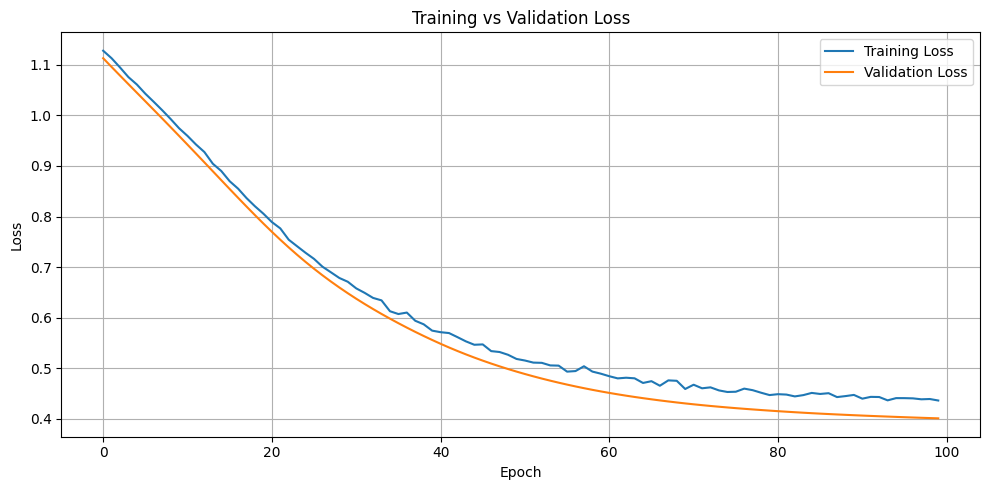

              precision    recall  f1-score   support

      person       0.88      0.97      0.93       399
    artifact       0.73      0.83      0.78       106
   ambiguous       0.00      0.00      0.00        55

    accuracy                           0.85       560
   macro avg       0.54      0.60      0.57       560
weighted avg       0.77      0.85      0.81       560



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

model = ProbingMLP(input_dim=X.shape[1], num_classes=3)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
val_losses = []

for epoch in range(100):
    # Train step
    model.train()
    optimizer.zero_grad()
    logits = model(X_train)
    loss = loss_fn(logits, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation step
    model.eval()
    with torch.no_grad():
        val_logits = model(X_test)
        val_loss = loss_fn(val_logits, y_test)
        val_losses.append(val_loss.item())

# Final evaluation
model.eval()
with torch.no_grad():
    test_logits = model(X_test)
    test_preds = torch.argmax(test_logits, dim=1).numpy()
    y_test_np = y_test.numpy()

print("Final classification report on validation set:")
print(classification_report(y_test_np, test_preds, target_names=["person", "artifact", "ambiguous"]))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# Test model
model.eval()
with torch.no_grad():
    preds = model(X_test).argmax(dim=1).numpy()
    print(classification_report(y_test, preds, target_names=["person", "artifact", "ambiguous"]))

# Classifier 2

2 classes

### Embedding

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# --- Define label mapping ---
# 0 = inanimate, 1 = animate, 2 = ambiguous (both)
label_map = {
    ('inanimate_entity',): 0,
    ('animate_entity',): 1,
    ('inanimate_entity', 'animate_entity'): 2,
    ('animate_entity', 'inanimate_entity'): 2  # order may vary
}

# --- Prepare training data (label 0 and 1 only), and test data (label 2 only) ---
X_train, y_train = [], []
X_test, test_words = [], []

for i, word in enumerate(words):
    if not word.endswith('eur'):
        continue
    label = tuple(lemma_to_hypersense.get(word, []))
    mapped = label_map.get(label)
    vec = embeddings[i]

    if vec is not None:
        if mapped in [0, 1]:  # inanimate or animate
            X_train.append(vec)
            y_train.append(mapped)
        elif mapped == 2:  # ambiguous
            X_test.append(vec)
            test_words.append(word)

# Convert to tensors
X_train = torch.tensor(np.array(X_train, dtype=np.float32))
y_train = torch.tensor(y_train)
X_test = torch.tensor(np.array(X_test, dtype=np.float32))

In [ ]:
from collections import Counter

label_counts = Counter(y_train.numpy())
print("Label distribution in y_train:")
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")

Label distribution in y_train:
Label 1: 2043 samples
Label 0: 625 samples


In [ ]:
import numpy as np
from collections import defaultdict

# Convert to numpy arrays for easier indexing
X_np = X_train.numpy()
y_np = y_train.numpy()

# Collect indices for each class
class_indices = defaultdict(list)
for i, label in enumerate(y_np):
    class_indices[label].append(i)

# Find the minimum class size
min_class_size = min(len(class_indices[0]), len(class_indices[1]))
print(f"Balancing to {min_class_size} samples per class")

# Randomly sample min_class_size indices from each class
np.random.seed(42)
balanced_indices = []

for label in [0, 1]:
    selected = np.random.choice(class_indices[label], size=min_class_size, replace=False)
    balanced_indices.extend(selected)

# Shuffle the combined indices
np.random.shuffle(balanced_indices)

# Recreate balanced tensors
X_balanced = torch.tensor(X_np[balanced_indices], dtype=torch.float32)
y_balanced = torch.tensor(y_np[balanced_indices])

Balancing to 625 samples per class


In [ ]:
print(X_balanced.shape)
print(X_test.shape)

torch.Size([1250, 100])
torch.Size([322, 100])


In [ ]:
from sklearn.model_selection import train_test_split

# Create a train/validation split on the original X_train
X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X_balanced.numpy(), y_balanced.numpy(),
    test_size=0.2, stratify=y_balanced.numpy(), random_state=42
)

# Convert back to PyTorch tensors
X_subtrain = torch.tensor(X_subtrain, dtype=torch.float32)
y_subtrain = torch.tensor(y_subtrain)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val)

Final classification report on validation set:
              precision    recall  f1-score   support

   inanimate       0.95      0.91      0.93       125
     animate       0.92      0.95      0.93       125

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



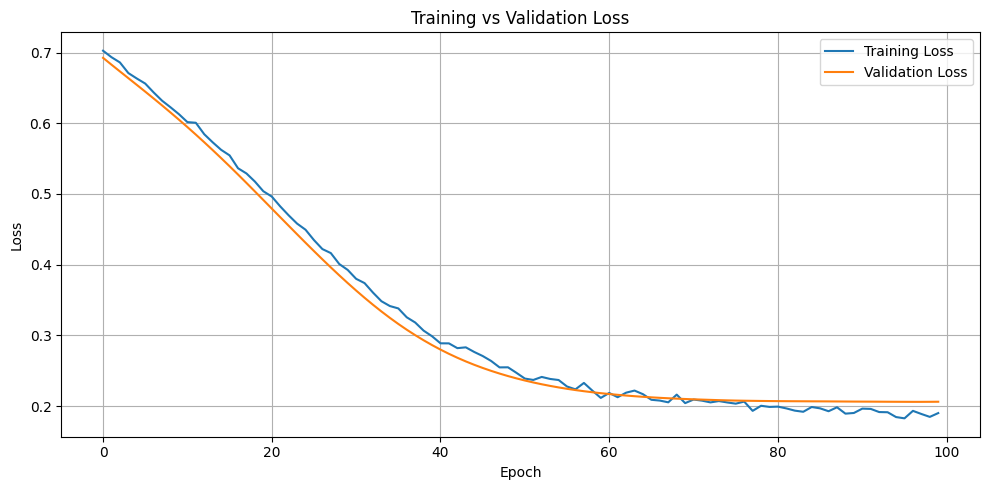

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Reinitialize model and optimizer
model = ProbingMLP(input_dim=X_subtrain.shape[1], num_classes=2)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

train_losses = []
val_losses = []

for epoch in range(100):
    # Train step
    model.train()
    optimizer.zero_grad()
    logits = model(X_subtrain)
    loss = loss_fn(logits, y_subtrain)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation step
    model.eval()
    with torch.no_grad():
        val_logits = model(X_val)
        val_loss = loss_fn(val_logits, y_val)
        val_losses.append(val_loss.item())

# Final evaluation
model.eval()
with torch.no_grad():
    val_logits = model(X_val)
    val_preds = torch.argmax(val_logits, dim=1).numpy()
    y_val_np = y_val.numpy()

print("Final classification report on validation set:")
print(classification_report(y_val_np, val_preds, target_names=["inanimate", "animate"]))

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Evaluation on Validation Set:")
print(f"Accuracy: {accuracy_score(y_val_np, val_preds):.4f}")
print(classification_report(y_val_np, val_preds, target_names=["inanimate", "animate"]))

Evaluation on Validation Set:
Accuracy: 0.9320
              precision    recall  f1-score   support

   inanimate       0.95      0.91      0.93       125
     animate       0.92      0.95      0.93       125

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
model.eval()
with torch.no_grad():
    probs = torch.softmax(model(X_test), dim=1).numpy()  # probs[:, 1] is P(animate)
    val_logits = model(X_val)
    val_probs = torch.softmax(val_logits, dim=1).numpy()

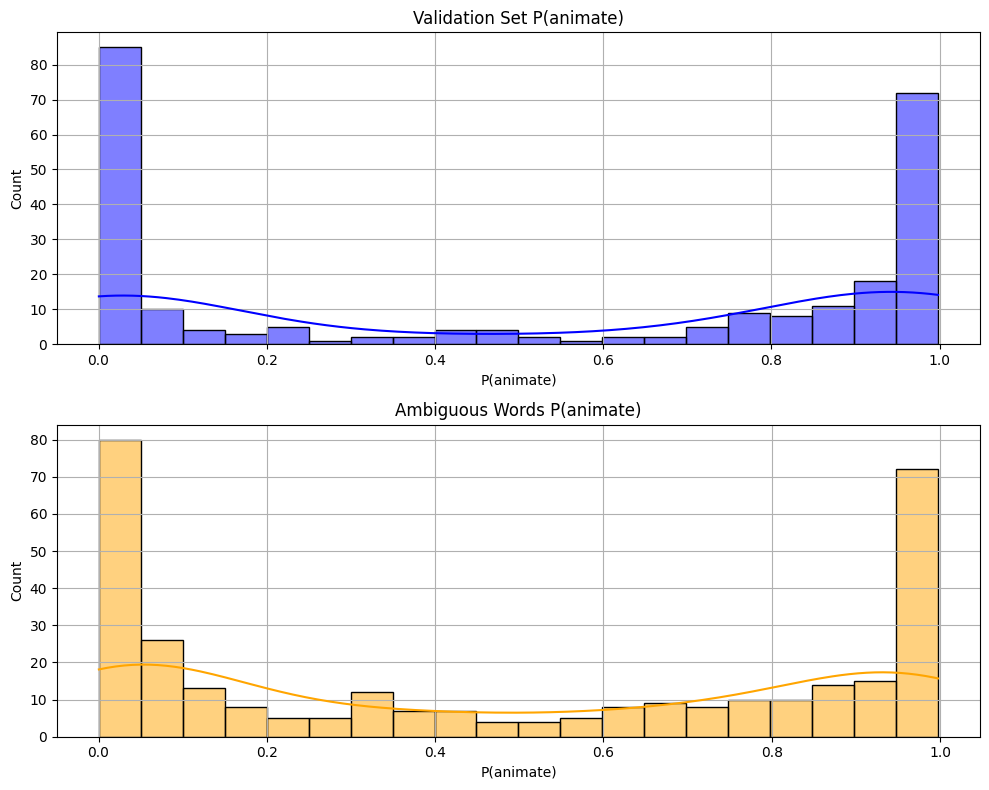

In [ ]:
animate_probs = probs[:, 1]  # Probability of animate class
val_animate_probs = val_probs[:, 1]

# Plot both distributions together
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.histplot(val_animate_probs, bins=20, kde=True, color='blue')
plt.title("Validation Set P(animate)")
plt.xlabel("P(animate)")
plt.grid(True)

plt.subplot(2, 1, 2)
sns.histplot(animate_probs, bins=20, kde=True, color='orange')
plt.title("Ambiguous Words P(animate)")
plt.xlabel("P(animate)")
plt.grid(True)

plt.tight_layout()
plt.show()

# adj
count the cosine similarity with the adj

In [ ]:
instrument_adjectives = set(["électrique", "électronique", "étanche", "démontable", "optique", "thermique",
                         "numérique", "automatique", "mécanique", "portable", "portatif", "économique",
                         "acoustique", "magnétique", "durable", "usé", "incassable", "automobile", "imperméable", "défectueux"
])

In [ ]:
agent_adjectives = set([
    "généreux", "paresseux", "ambitieux", "honnête", "intelligent", "courageux",
    "gentil", "jaloux", "curieux", "sociable", "timide",
    "arrogant", "créatif", "colérique", "attentionné", "loyal", "responsable", "hésitant",
    "égoïste", "sincère"
])

In [ ]:
instrument_adj_emb, agent_adj_emb = [], []

for i, word in enumerate(prep_data['words']):
    vector = prep_data["embeddings"][i]
    prefix = word.split('_')[0]
    postfix = word.split('_')[-1]
    if postfix != 'adj':
        continue
    if prefix in instrument_adjectives:
        instrument_adj_emb.append(vector)
    elif prefix in agent_adjectives:
        agent_adj_emb.append(vector)

In [ ]:
print(len(agent_adj_emb))
print(len(instrument_adj_emb))

20
20


In [ ]:
label_map = {
    ('inanimate_entity',): 0,
    ('animate_entity',): 1,
    ('inanimate_entity', 'animate_entity'): 2,
    ('animate_entity', 'inanimate_entity'): 2  # the order might be different
}

agent_word_emb, instrument_word_emb, ambiguous_word_emb = [], [], []

# based on hypersense
for i, word in enumerate(words):
    if not word.endswith('eur'):
      continue
    label = tuple(lemma_to_hypersense.get(word, []))
    if label not in label_map:
      continue
    vector = embeddings[i]
    if label == ('inanimate_entity',):
      instrument_word_emb.append(vector)
    elif label == ('animate_entity',):
      agent_word_emb.append(vector)
    else:
      ambiguous_word_emb.append(vector)

print(len(agent_word_emb))
print(len(instrument_word_emb))
print(len(ambiguous_word_emb))


2043
625
322


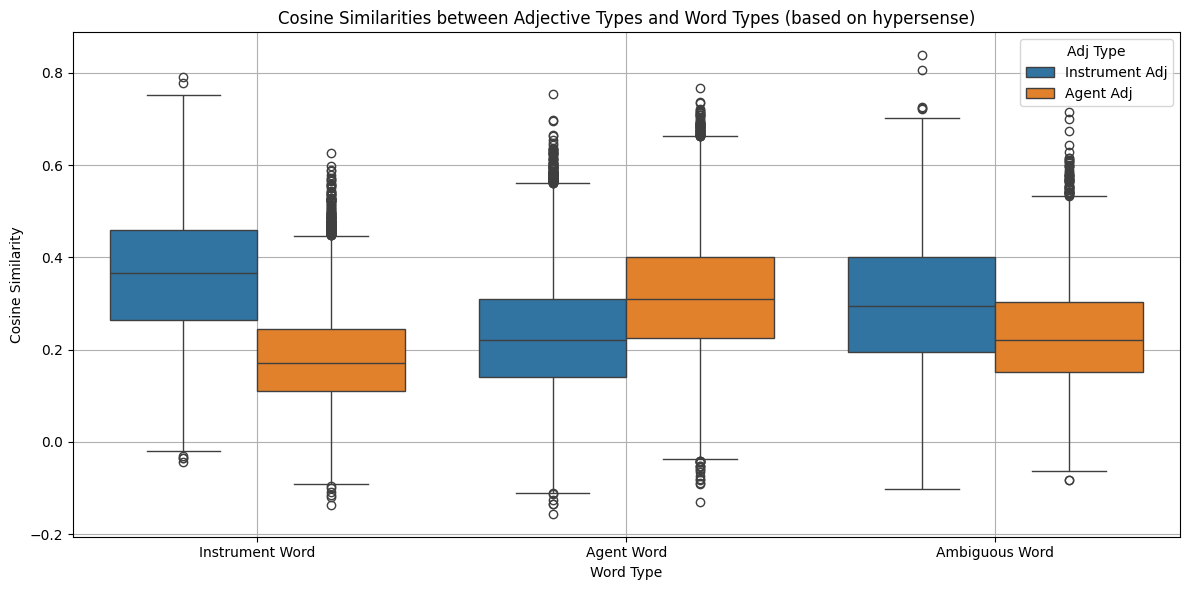

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import pandas as pd

# Utility function: compute cosine similarities between a list of adjectives and a list of words
def compute_cosine_similarities(adjs, words, adj_label, word_label):
    sims = []
    for adj in adjs:
        sim_scores = cosine_similarity([adj], words)[0]
        for score in sim_scores:
            sims.append({
                "Adj Type": adj_label,
                "Word Type": word_label,
                "Cosine Similarity": score
            })
    return sims

# Compute cosine similarities for all adjective-word type combinations
results = []
results += compute_cosine_similarities(instrument_adj_emb, instrument_word_emb, "Instrument Adj", "Instrument Word")
results += compute_cosine_similarities(instrument_adj_emb, agent_word_emb, "Instrument Adj", "Agent Word")
results += compute_cosine_similarities(instrument_adj_emb, ambiguous_word_emb, "Instrument Adj", "Ambiguous Word")
results += compute_cosine_similarities(agent_adj_emb, instrument_word_emb, "Agent Adj", "Instrument Word")
results += compute_cosine_similarities(agent_adj_emb, agent_word_emb, "Agent Adj", "Agent Word")
results += compute_cosine_similarities(agent_adj_emb, ambiguous_word_emb, "Agent Adj", "Ambiguous Word")

# Convert to a pandas DataFrame for visualization
df = pd.DataFrame(results)

# Plot the cosine similarity distributions using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Word Type", y="Cosine Similarity", hue="Adj Type")
plt.title("Cosine Similarities between Adjective Types and Word Types (based on hypersense)")
plt.tight_layout()
plt.grid(True)
plt.show()


In [ ]:
# based on supersense
label_map = {
    ('artifact',): 0,
    ('person',): 1,
    ('artifact', 'person'): 2,
    ('person', 'artifact'): 2  # the order might be different
}

agent_word_emb, instrument_word_emb, ambiguous_word_emb = [], [], []

for i, word in enumerate(words):
    if not word.endswith('eur'):
      continue
    label = tuple(lemma_to_supersense.get(word, []))
    if label not in label_map:
      continue
    vector = embeddings[i]
    if label == ('artifact',):
      instrument_word_emb.append(vector)
    elif label == ('person',):
      agent_word_emb.append(vector)
    else:
      ambiguous_word_emb.append(vector)

print(len(agent_word_emb))
print(len(instrument_word_emb))
print(len(ambiguous_word_emb))


1992
528
276


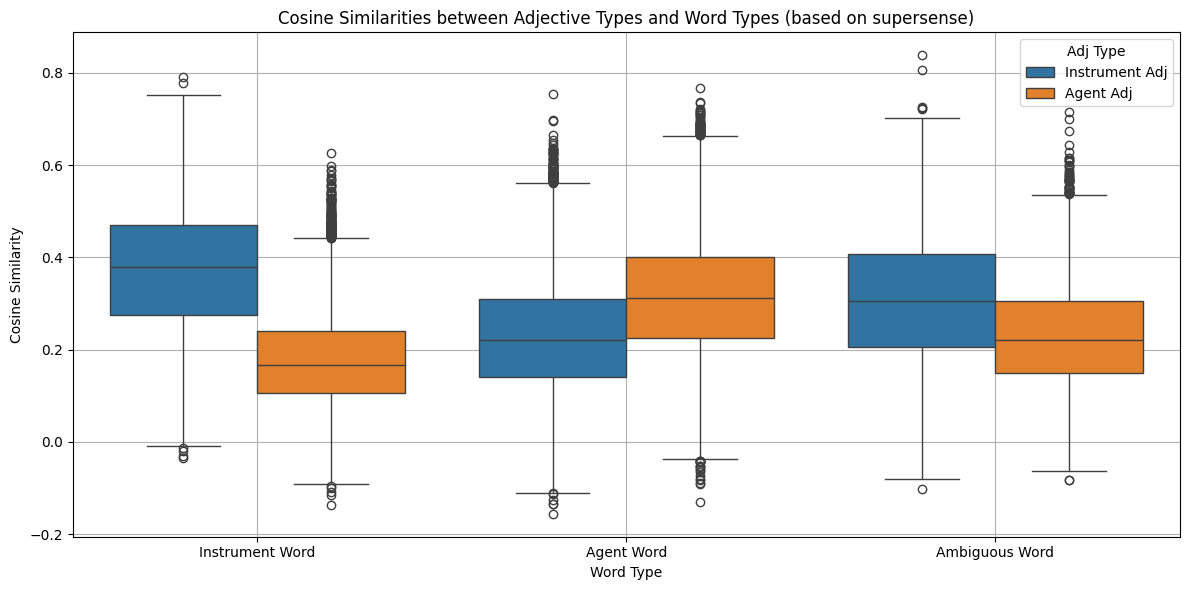

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import pandas as pd

# Utility function: compute cosine similarities between a list of adjectives and a list of words
def compute_cosine_similarities(adjs, words, adj_label, word_label):
    sims = []
    for adj in adjs:
        sim_scores = cosine_similarity([adj], words)[0]
        for score in sim_scores:
            sims.append({
                "Adj Type": adj_label,
                "Word Type": word_label,
                "Cosine Similarity": score
            })
    return sims

# Compute cosine similarities for all adjective-word type combinations
results = []
results += compute_cosine_similarities(instrument_adj_emb, instrument_word_emb, "Instrument Adj", "Instrument Word")
results += compute_cosine_similarities(instrument_adj_emb, agent_word_emb, "Instrument Adj", "Agent Word")
results += compute_cosine_similarities(instrument_adj_emb, ambiguous_word_emb, "Instrument Adj", "Ambiguous Word")
results += compute_cosine_similarities(agent_adj_emb, instrument_word_emb, "Agent Adj", "Instrument Word")
results += compute_cosine_similarities(agent_adj_emb, agent_word_emb, "Agent Adj", "Agent Word")
results += compute_cosine_similarities(agent_adj_emb, ambiguous_word_emb, "Agent Adj", "Ambiguous Word")

# Convert to a pandas DataFrame for visualization
df = pd.DataFrame(results)

# Plot the cosine similarity distributions using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Word Type", y="Cosine Similarity", hue="Adj Type")
plt.title("Cosine Similarities between Adjective Types and Word Types (based on supersense)")
plt.tight_layout()
plt.grid(True)
plt.show()


# Results

For the 3-class model, both two models based on hypersense and supersense achieve high accuracy (0.85 for supersense and 0.83 for hypersense) on the instrument and agent classes, and their performance is relatively similar. However, they perform poorly on the ambiguous class, with very low recall (0.06 for supersense, 0.03 for hypersense) and correspondingly low F1-scores (0.11 and 0.06).

For the binary model on the clean test set (without ambiguous words), both the supersense and hypersense models perform very well, with high precision, recall, and F1-scores for both instrument and agent classes. The hypersense model slightly outperforms supersense overall, achieving a higher accuracy (0.94 vs. 0.92) and marginally better F1-scores. This suggests that hypersense generalizes slightly better on clean, unambiguous data.

(a picture of PCA 2D Visualization here)

Here is the PCA 2D Visualization of the "-eur" words. It can be seen that the ambiguous words disperse everywhere. It indicates that ambiguous words do not form tight clusters with either clearly defined semantic group.

(two picture of adj here)

For the second experiment, adjectives are added. The boxplot illustrates the cosine similarity between two types of adjectives—Instrument Adj and Agent Adj—and three categories of nouns: Instrument Words, Agent Words, and Ambiguous Words. The results show that Instrument Adjectives have higher similarity with Instrument Words, whereas Agent Adjectives are more similar to Agent Words. This suggests that each adjective type is semantically aligned with its corresponding noun category. In contrast, similarities with Ambiguous Words fall between the other two, reflecting their semantically mixed nature. Ambiguous nouns exhibit intermediate cosine similarity with both Instrument and Agent adjectives, suggesting that they semantically co-occur with both adjective types.